In [1]:
!unzip '/content/Animal_Dataset.zip'

Archive:  /content/Animal_Dataset.zip
   creating: dataset/
   creating: dataset/Testing/
   creating: dataset/Testing/bears/
  inflating: dataset/Testing/bears/k4 (100).jpeg  
  inflating: dataset/Testing/bears/k4 (100).jpg  
  inflating: dataset/Testing/bears/k4 (101).jpeg  
  inflating: dataset/Testing/bears/k4 (101).jpg  
  inflating: dataset/Testing/bears/k4 (102).jpeg  
  inflating: dataset/Testing/bears/k4 (102).jpg  
  inflating: dataset/Testing/bears/k4 (103).jpeg  
  inflating: dataset/Testing/bears/k4 (104).jpeg  
  inflating: dataset/Testing/bears/k4 (105).jpeg  
  inflating: dataset/Testing/bears/k4 (106).jpeg  
  inflating: dataset/Testing/bears/k4 (107).jpeg  
  inflating: dataset/Testing/bears/k4 (108).jpeg  
  inflating: dataset/Testing/bears/k4 (109).jpeg  
  inflating: dataset/Testing/bears/k4 (110).jpeg  
  inflating: dataset/Testing/bears/k4 (71).jpg  
  inflating: dataset/Testing/bears/k4 (72).jpeg  
  inflating: dataset/Testing/bears/k4 (72).jpg  
  inflating: da

In [2]:
# Data Augmentation

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
train_gen = ImageDataGenerator(rescale=(1./255),horizontal_flip=True,shear_range=0.2)
test_gen = ImageDataGenerator(rescale=(1./255))
#--> (0 to 255) convert to (0 to 1)

In [5]:
train = train_gen.flow_from_directory('/content/dataset/Training',
                                      target_size=(120, 120),
                                      class_mode='categorical',
                                      batch_size=8)
test = test_gen.flow_from_directory('/content/dataset/Testing',
                                    target_size=(120, 120),
                                      class_mode='categorical',
                                      batch_size=8)

Found 1238 images belonging to 4 classes.
Found 326 images belonging to 4 classes.


In [6]:
train.class_indices

{'bears': 0, 'crows': 1, 'elephants': 2, 'rats': 3}

#CNN

In [7]:
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense
from tensorflow.keras.models import Sequential

In [8]:
model = Sequential()
model.add(Convolution2D(20,(3,3),activation='relu',input_shape=(120, 120, 3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(45,activation='relu'))
model.add(Dense(4,activation='softmax'))

In [9]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [10]:
model.fit(train,batch_size=8,validation_data=test,epochs=10)

Epoch 1/10
155/155 [==============================] - 23s 142ms/step - loss: 1.4253 - accuracy: 0.3982 - val_loss: 1.0533 - val_accuracy: 0.5092
Epoch 2/10
155/155 [==============================] - 21s 134ms/step - loss: 0.9631 - accuracy: 0.5404 - val_loss: 0.7056 - val_accuracy: 0.8006
Epoch 3/10
155/155 [==============================] - 22s 138ms/step - loss: 0.7007 - accuracy: 0.7132 - val_loss: 0.4860 - val_accuracy: 0.7945
Epoch 4/10
155/155 [==============================] - 20s 126ms/step - loss: 0.5103 - accuracy: 0.8207 - val_loss: 0.2752 - val_accuracy: 0.9325
Epoch 5/10
155/155 [==============================] - 21s 134ms/step - loss: 0.3360 - accuracy: 0.8974 - val_loss: 0.2017 - val_accuracy: 0.9601
Epoch 6/10
155/155 [==============================] - 21s 134ms/step - loss: 0.2058 - accuracy: 0.9475 - val_loss: 0.0696 - val_accuracy: 0.9969
Epoch 7/10
155/155 [==============================] - 20s 126ms/step - loss: 0.1224 - accuracy: 0.9701 - val_loss: 0.0558 - val_ac

In [11]:
model.save('animal.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Testing

In [12]:
import numpy as np
from tensorflow.keras.preprocessing import image

In [27]:
img = image.load_img('/content/Z1__(33)[1].jpg',target_size=(120,120))

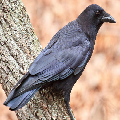

In [28]:
img

In [29]:
img = image.img_to_array(img)
img

array([[[121., 105.,  90.],
        [156., 137., 107.],
        [149., 144., 122.],
        ...,
        [250., 209., 187.],
        [243., 202., 180.],
        [243., 198., 175.]],

       [[141., 125., 110.],
        [106.,  85.,  68.],
        [225., 214., 192.],
        ...,
        [253., 218., 198.],
        [251., 216., 196.],
        [249., 208., 188.]],

       [[123.,  97.,  80.],
        [ 58.,  42.,  27.],
        [254., 229., 209.],
        ...,
        [253., 222., 201.],
        [251., 220., 199.],
        [252., 215., 196.]],

       ...,

       [[245., 200., 171.],
        [250., 204., 180.],
        [252., 212., 187.],
        ...,
        [249., 217., 194.],
        [246., 210., 188.],
        [243., 207., 183.]],

       [[248., 203., 174.],
        [253., 207., 183.],
        [252., 212., 187.],
        ...,
        [252., 220., 197.],
        [250., 214., 192.],
        [244., 208., 184.]],

       [[247., 202., 173.],
        [252., 206., 182.],
        [252., 2

In [30]:
img = np.expand_dims(img,axis=0)
img

array([[[[121., 105.,  90.],
         [156., 137., 107.],
         [149., 144., 122.],
         ...,
         [250., 209., 187.],
         [243., 202., 180.],
         [243., 198., 175.]],

        [[141., 125., 110.],
         [106.,  85.,  68.],
         [225., 214., 192.],
         ...,
         [253., 218., 198.],
         [251., 216., 196.],
         [249., 208., 188.]],

        [[123.,  97.,  80.],
         [ 58.,  42.,  27.],
         [254., 229., 209.],
         ...,
         [253., 222., 201.],
         [251., 220., 199.],
         [252., 215., 196.]],

        ...,

        [[245., 200., 171.],
         [250., 204., 180.],
         [252., 212., 187.],
         ...,
         [249., 217., 194.],
         [246., 210., 188.],
         [243., 207., 183.]],

        [[248., 203., 174.],
         [253., 207., 183.],
         [252., 212., 187.],
         ...,
         [252., 220., 197.],
         [250., 214., 192.],
         [244., 208., 184.]],

        [[247., 202., 173.],
       

Final output

In [32]:
b=np.argmax(model.predict(img))
if(b==1):
  b='a crow'
else:
  b='an animal'
print("Our model says it is ",b)

1/1 [==============================] - 0s 23ms/step
Our model says it is  a crow
